## Configurações

-   1 - Instalação das dependências necessárias localmente utilizando pip

Shell Script

In [ ]:
!pip3 install pandas numpy matplotlib seaborn

PowerShell

In [ ]:
pip3 install pandas numpy matplotlib seaborn

##   Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

---
##   1 - Coletar de dados 

Capturando o conjunto de dados possuindo as informações necessárias.

Definição de um conjunto de parâmetros para a solicitação de download de um arquivo CSV, especificando o hash do arquivo, o diretório de destino e o nome do arquivo.

In [231]:
params = {
    "hash": '1oO3Q_2gIMQcdxj7D0ZqT0UaWYjLIgFQq_tWva_Qhn0I',
    "dst": '../assets/',
    "filename": 'data.csv',
}

Obtendo dados da planilha do Google Sheets, os carregando em um DataFrame do Pandas e, opcionalmente, os salva como um arquivo CSV localmente.

In [232]:
def get_data( hash: str, dst: str, filename: str, save = False ):
    url = f""" https://docs.google.com/spreadsheets/d/{hash}/export?format=csv """
    df = pd.read_csv( url )

    if save:
        df.to_csv( f"""{ dst }/{ filename }""" )

    return df

df_empreg = get_data( **params )

-   Replace nas universidades para se tornarem apenas siglas

Salvamento do arquivo


In [233]:
file_creator = get_data( **{ **params, "save": True } )

---
##  2 -  Tratamento dos dados

-   Separando colunas numéricas e de strings para tratamentos posteriores

TRATAR DADOS PARA MOSTRAR SOMENTE ABREVISTURA DA UNIVERSIDADE

In [234]:
cols_str = [
    'Nome',
    'Estado',
    'Cidade',
    'Etnia',
    'Universidade',
    'Curso',
    'StatusEmpregaticio',
    'FonteEmprego',
    'TraineeEstag',
    'MaiorDificuldadeEmprego',
    'SeEmpregado',
    'AreaTrabalho',
    'ModoTrabalho',
    'OpiniaoFaculdadeEmprego',
    'UniversidadeTipo'
]
cols_num = [
    'Id',
    'Idade',
    'SemestreAtual',
    'PretenSalarial'    
]

-   Transformando todas as strings em maiúsculas

In [235]:
df_empreg[ cols_str ] = df_empreg[ cols_str ].apply( lambda x: x.str.upper() )

-   Replace nas universidades para se tornarem apenas siglas

In [241]:
df_empreg['Universidade'] = df_empreg['Universidade'].replace({
    'UNIVERSIDADE FEDERAL DA BAHIA (UFBA)': 'UFBA',
    'FACULDADE DE ADMINISTRAÇÃO E TECNOLOGIA (FAT)': 'FAT',
    'UNIVERSIDADE CATÓLICA DO SALVADOR (UCSAL)': 'UCSAL',
    'UNIVERSIDADE SALVADOR (UNIFACS)': 'UNIFACS',
    'ESCOLA BAHIANA DE MEDICINA E SAÚDE PÚBLICA (EBMSP)': 'EBMSP',
    'CENTRO UNIVERSITÁRIO JORGE AMADO (UNIJORGE)': 'UNIJORGE',
    'FACULDADE DE TECNOLOGIA E CIÊNCIAS (FTC)': 'FTC',
    'FACULDADE RUY BARBOSA (FRB)': 'FRB',
    'UNIVERSIDADE DO ESTADO DA BAHIA (UNEB)': 'UNEB',
    'FACULDADE MAURÍCIO DE NASSAU (UNINASSAU)': 'UNINASSAU'
})

-   Ordenando os dados para melhor visualização com base na coluna de Id

In [236]:
df_empreg.sort_values( by= cols_num[0], ascending=True, inplace=True )

---
##   Overview

Informações importantes do dataframe

In [ ]:
df_empreg.info()

Informações de quantidade de dados e colunas

In [ ]:
df_empreg.shape

Colunas do dataframe

In [ ]:
df_empreg.columns

Valores do dataframe

In [ ]:
df_empreg.values

Quantidade de respostas

In [280]:
total_respostas = len(df_empreg)

Informações de métrica referente aos valores numéricos do Dataframe

In [229]:
df_empreg.describe()

,Id,Idade,Unnamed: 9,SemestreAtual,PretenSalarial
count,1038.000000,1038.000000,0.0,1038.000000,1038.000000
mean,519.500000,22.268786,NaN,6.769750,1279.133911
std,299.789093,4.141193,NaN,3.439513,408.800973
min,1.000000,18.000000,NaN,1.000000,600.000000
25%,260.250000,20.000000,NaN,4.000000,918.500000
50%,519.500000,22.000000,NaN,7.000000,1262.000000
75%,778.750000,24.000000,NaN,10.000000,1641.500000
max,1038.000000,45.000000,NaN,12.000000,2000.000000


#   ANÁLISE DESCRITIVA

Variáveis categóricas [etnia, universidade, curso, semestre, status empregatício, FonteEmprego, AreaTrabalho, ModoTrabalho, OpiniaoFaculdadeEmprego, PretenSalarial]  - gráfico de barra

####   Configuração geral dos gráficos

In [242]:
plt.rcParams['figure.figsize'] = (20,6)
sns.set_theme(color_codes=True)

In [ ]:
df_empreg['Universidade'].describe()
sns.barplot(data=df_empreg.reset_index(), x='Universidade', y='index')
plt.xticks(rotation=50);
sns.barplot(data=df_empreg.reset_index(), x='Universidade', y='index')
plt.xticks(rotation=50);

####    Quantidade de respostas por universitários na bahia

-   Com base em nossa análise, constatamos que a quantidade equivalente a 41.000 universitários atualmente na Bahia representam 0.27% da população atual conforme IBGE (15,13 Milhões) onde nossa pesquisa atingiu 2.53% da taxa dos universitários.
-   Fontes: 
-   https://www.ibge.gov.br/cidades-e-estados/ba/\
-   https://www.semesp.org.br/mapa/edicao-11/regioes/nordeste/bahia/#:~:text=Do%20total%20de%20alunos%20do,132%20mil%20na%20modalidade%20EAD.


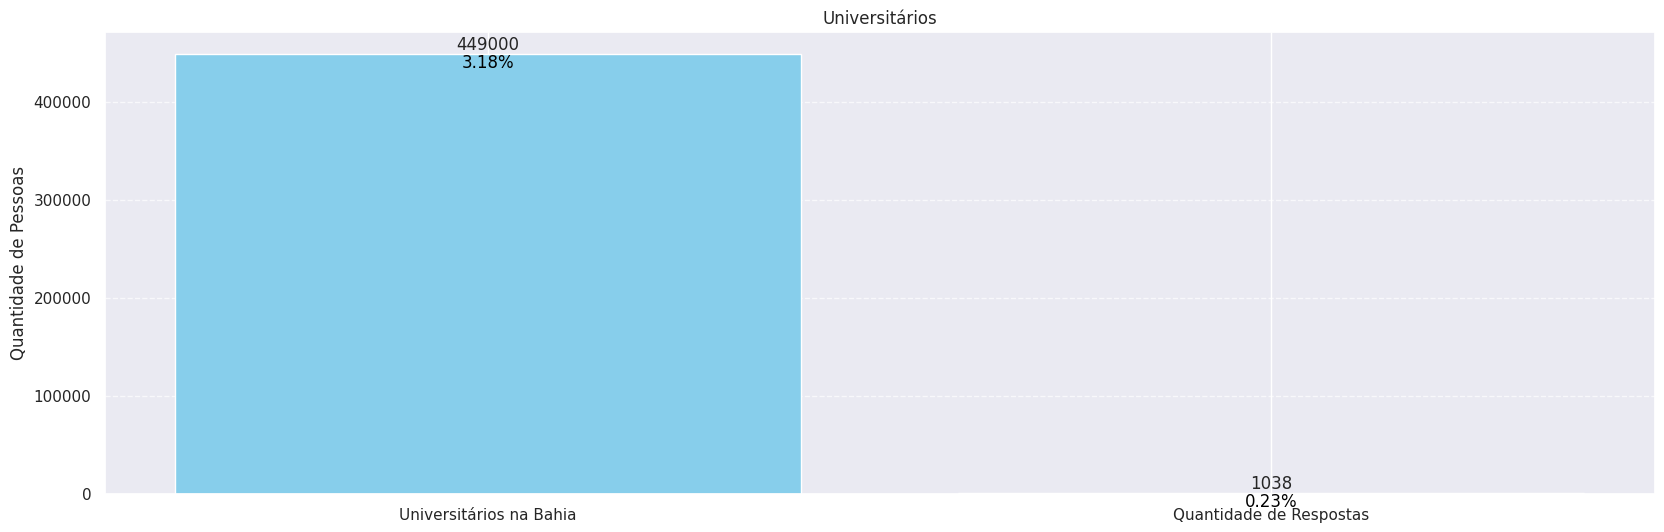

In [346]:
univ_bahia = 449000

populacao_bahia = 14141626

porcentagem_universitarios = (univ_bahia / populacao_bahia) * 100
quantidade_respostas = len(df_empreg)

porcentagem_respostas = (quantidade_respostas / univ_bahia) * 100

fig, ax = plt.subplots()
bars = ax.bar(['Universitários na Bahia', 'Quantidade de Respostas'], [univ_bahia, quantidade_respostas], color=['skyblue', 'orange'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

ax.text(0, univ_bahia - 0.5, f'{porcentagem_universitarios:.2f}%', ha='center', va='top', color='black')
ax.text(1, quantidade_respostas - 0.5, f'{porcentagem_respostas:.2f}%', ha='center', va='top', color='black')

plt.title('Universitários')
plt.ylabel('Quantidade de Pessoas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###   Faixa Etária

-   Com a análise realizada, foi possível identificar que as respostas variam entre 18 a 45 anos.

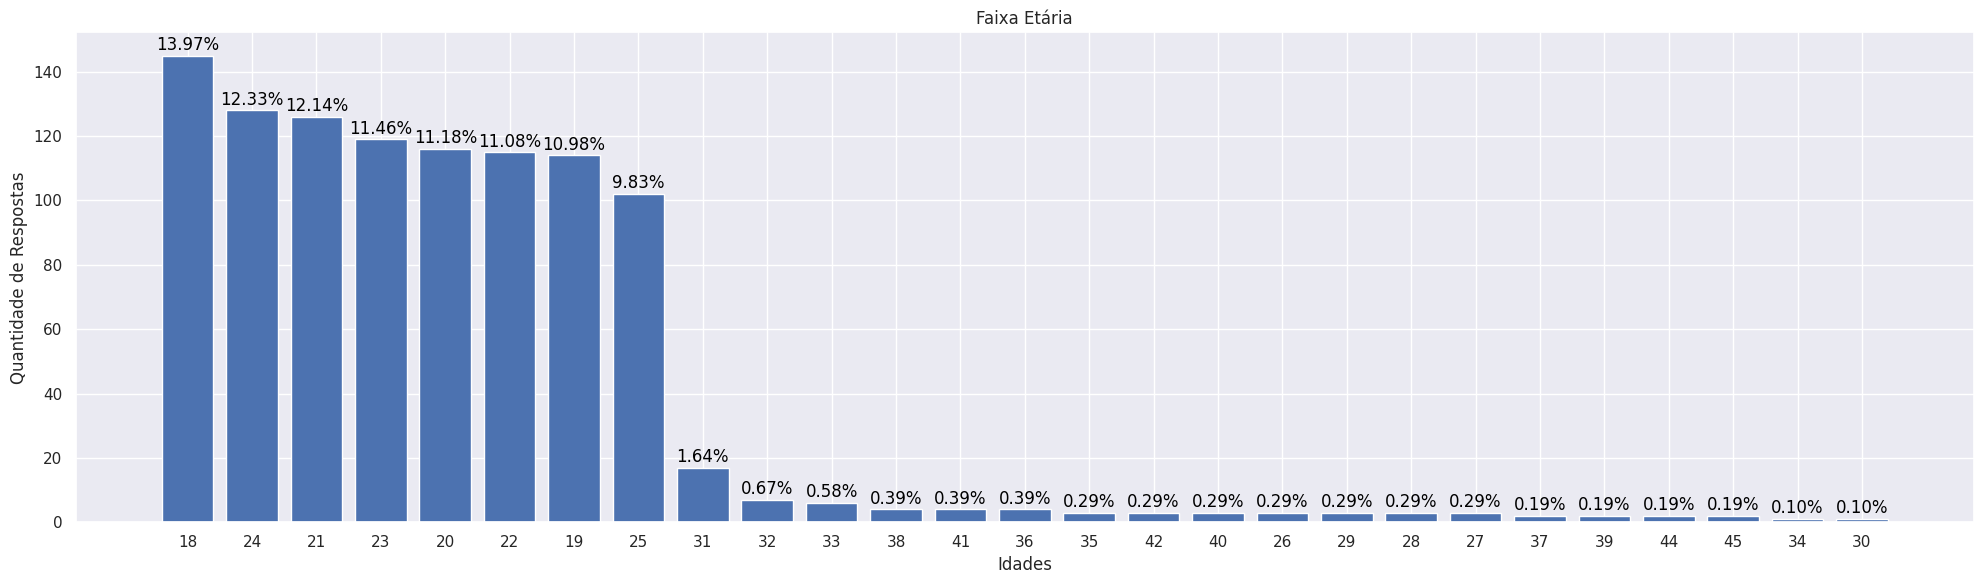

In [326]:
value_counts = df_empreg[cols_num[1]].value_counts()

porcentagem = (value_counts / total_respostas) * 100

bars = plt.bar(value_counts.index.astype(str), value_counts.values)

for i, (index, bar) in enumerate(zip(value_counts.index, bars)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{porcentagem[index]:.2f}%', ha='center', va='bottom', color='black')

plt.title('Faixa Etária')
plt.xlabel('Idades')
plt.ylabel('Quantidade de Respostas')
plt.grid(True)
plt.tight_layout()
plt.show()



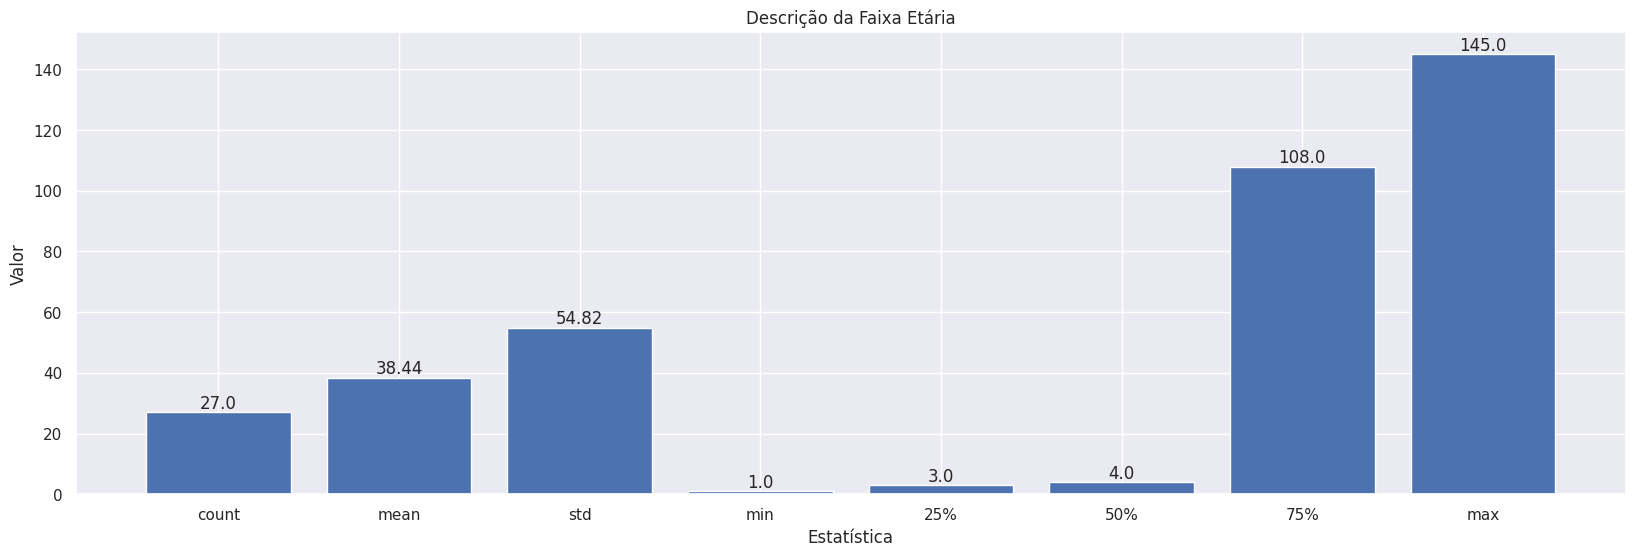

In [330]:
describe_df = df_empreg[cols_num[1]].describe()

bars = plt.bar(describe_df.index, describe_df.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Descrição da Faixa Etária')
plt.xlabel('Estatística')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


-   Pessoas desempregadas por cidade

In [ ]:
populacao_cidades = {
    'salvador': 2417678 , 
    'lauro de freitas': 201635,
    'simões filhos': 135783 ,
    'candeias': 72382
}

por_cidade = df_empreg[cols_str[2]].value_counts()

porcentagem_por_cidade = {}

for cidade, contagem_empregados in por_cidade.items():
    cidade_lower = cidade.lower()
    if cidade_lower in populacao_cidades:
        porcentagem_por_cidade[cidade] = (contagem_empregados / populacao_cidades[cidade_lower]) * 100
    else:
        porcentagem_por_cidade[cidade] = None

print("\nQuantidade de respostas por Cidade:")
print(por_cidade)
print("\nPorcentagem de respostas em relação à População por Cidade:")
for cidade, porcentagem in porcentagem_por_cidade.items():
    if porcentagem is not None:
        print(f"{cidade}: {porcentagem:.2f}%")
    else:
        print(f"{cidade}: População não encontrada")


-   Porcentagem em relação a taxa de desemprego na Bahia

In [ ]:
numero_empregados = df_empreg['Id'].count()

populacao_bahia = 14141626

taxa_desemprego_bahia = 13.2 / 100

porcentagem_empregados = (numero_empregados / populacao_bahia) * 100

porcentagem_relacao_desemprego = (porcentagem_empregados / (100 - taxa_desemprego_bahia)) * 100

print(f"A quantidade de respostas representa aproximadamente {porcentagem_relacao_desemprego:.2f}% da taxa de desemprego na Bahia.")


### Plataformas

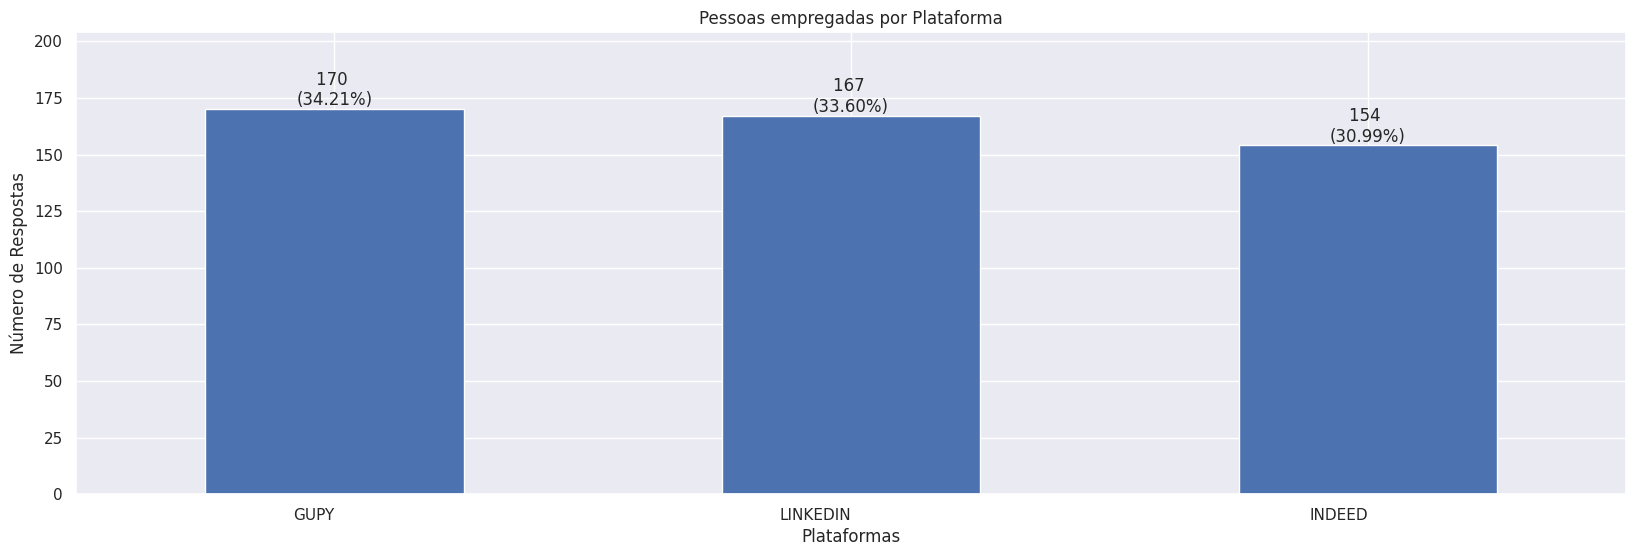

In [385]:
plataformas = df_empreg['FonteEmprego']

contagem_por_plat = plataformas.value_counts()

total_respostas_plat = contagem_por_plat.sum()

porcentagens_por_plat = contagem_por_plat[contagem_por_plat / total_respostas_plat * 100 > 1]

ax = porcentagens_por_plat.plot(kind='bar')
plt.xlabel('Plataformas')
plt.ylabel('Número de Respostas')
plt.title('Pessoas empregadas por Plataforma')
ax.set_ylim([0, contagem_por_plat.max()*1.20])

plt.xticks(rotation=0, ha='right')

for i in ax.patches:
    quantidade = i.get_height()
    porcentagem = quantidade / total_respostas_plat * 100
    plt.text(i.get_x() + i.get_width() / 2, i.get_height(), f"{quantidade} \n({porcentagem:.2f}%)", ha='center', va='bottom')
plt.show()


###  Semestre

-   Com a análise realizada, identificamos 10,12% das respostas, representando maioria da resposta é referente a alunos cursando o número máximo estipulado por semestre.

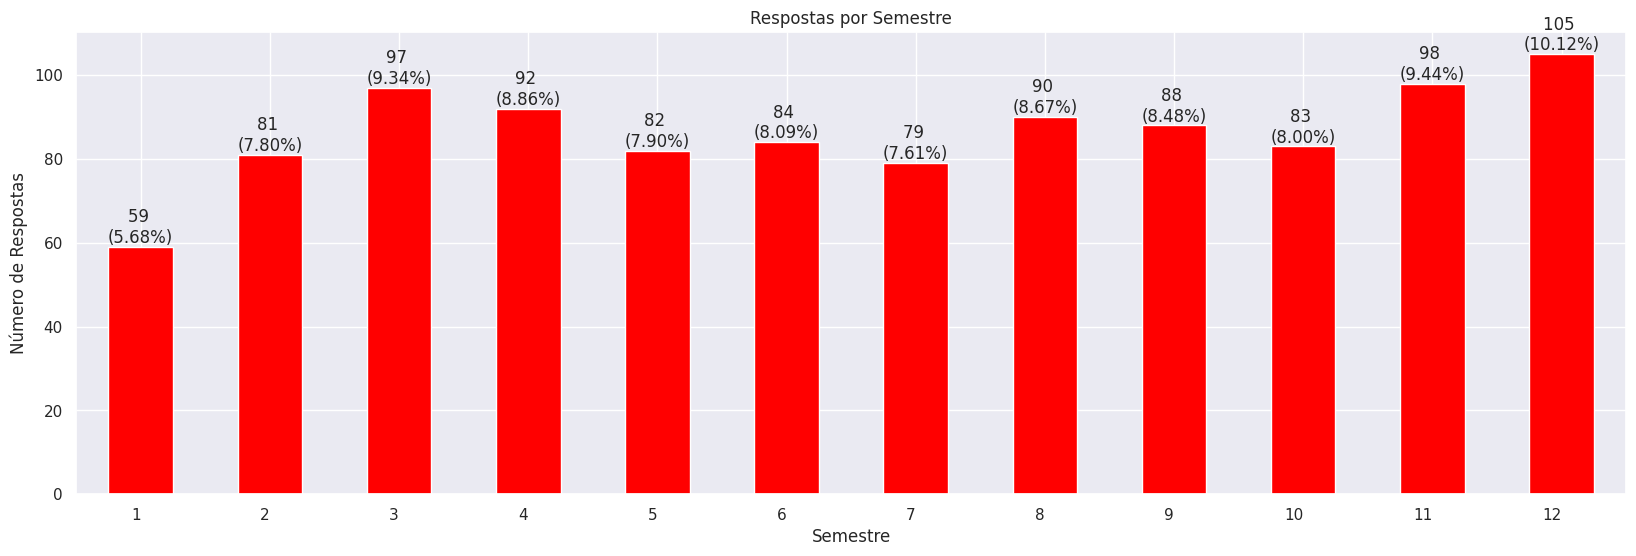

In [341]:
por_semestre = df_empreg[ 'SemestreAtual' ]

contagem_por_semestre = por_semestre.value_counts().sort_index()

total_respostas = contagem_por_semestre.sum()

ax = contagem_por_semestre.plot(kind='bar', color='red')
plt.xlabel('Semestre')
plt.ylabel('Número de Respostas')
plt.title('Respostas por Semestre')

plt.xticks(rotation=0, ha='right')
for i in ax.patches:
    quantidade = i.get_height()
    porcentagem = (quantidade / total_respostas) * 100
    plt.text(i.get_x() + i.get_width() / 2, i.get_height(), f"{quantidade} \n({porcentagem:.2f}%)", ha='center', va='bottom')
plt.show()

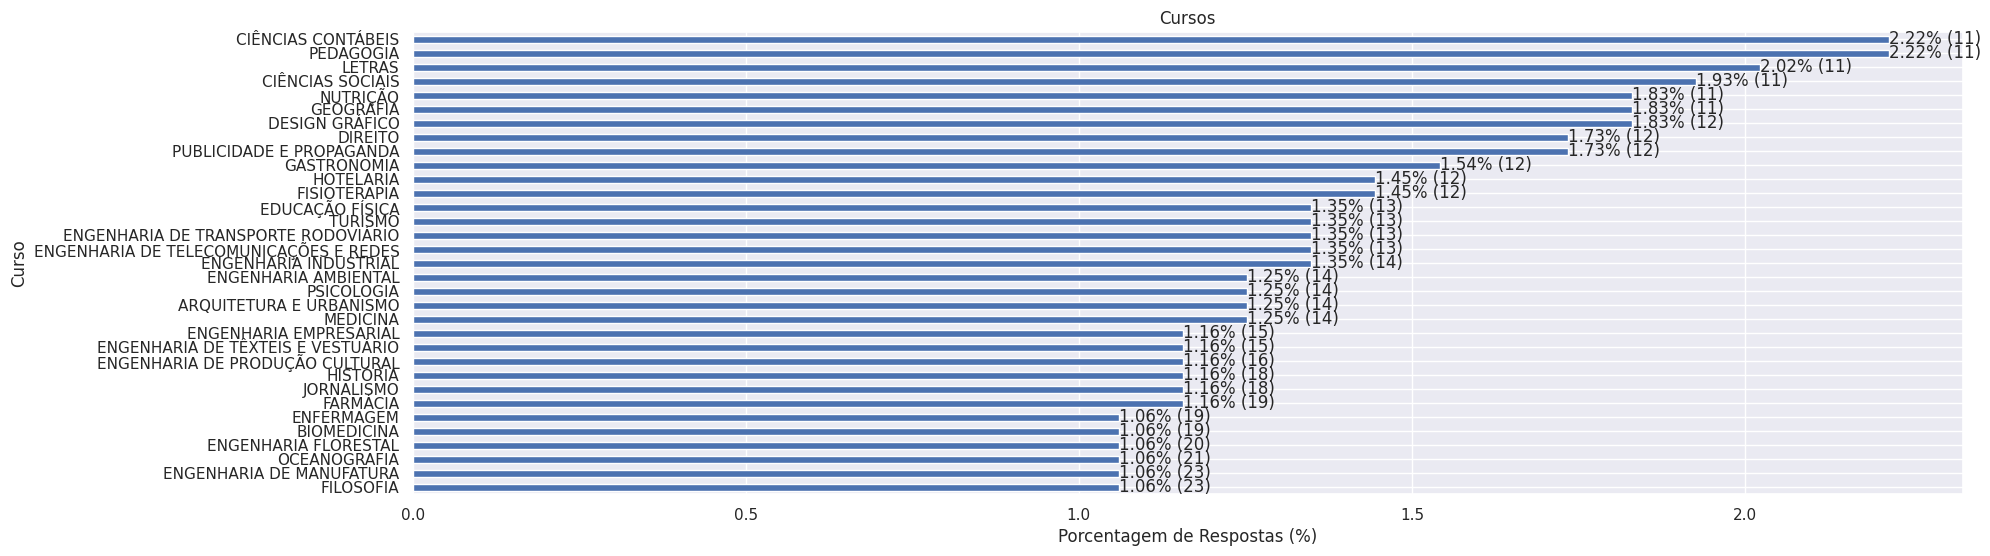

In [358]:
por_curso = df_empreg['Curso']
total_respostas = len(por_curso)

contagem_por_curso = por_curso.value_counts()
porcentagens_por_curso = (contagem_por_curso / total_respostas) * 100
porcentagens_por_curso = porcentagens_por_curso[porcentagens_por_curso > 1]
porcentagens_por_curso = porcentagens_por_curso.sort_values(ascending=True)

porcentagens_por_curso.plot(kind='barh')

for i in range(len(porcentagens_por_curso)):
    plt.text(porcentagens_por_curso.iloc[i], i, f'{porcentagens_por_curso.iloc[i]:.2f}% ({contagem_por_curso.iloc[i]})', ha='left', va='center')

plt.xlabel('Porcentagem de Respostas (%)')
plt.ylabel('Curso')
plt.title('Cursos')
plt.show()


### Etnia

-   Com a análise realizada, identificamos que a quantidade de negros desempregados em comparativo com a quantidade de respostas é de 67.7%.

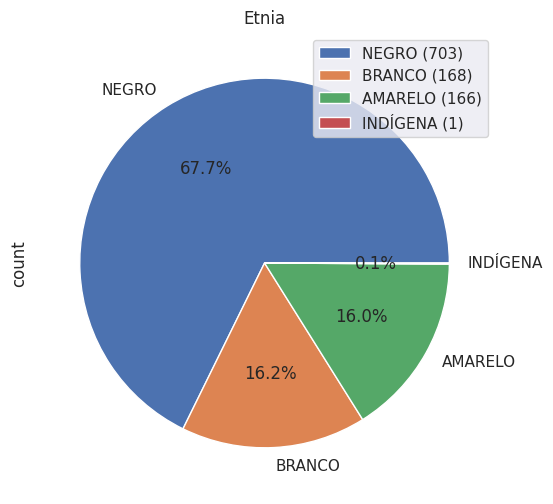

In [363]:
por_raca = df_empreg['Etnia']
por_raca.replace({'PARDO': 'NEGRO', 'PRETO': 'NEGRO'}, inplace=True)

contagem_por_raca = por_raca.value_counts()

contagem_por_raca.plot(kind='pie', autopct='%1.1f%%')
plt.title('Etnia')

plt.legend(labels=[f'{raça} ({quantidade})' for raça, quantidade in contagem_por_raca.items()], loc='best')
plt.show()

### Dificuldades

In [ ]:
dificuldades = df_empreg['MaiorDificuldadeEmprego']
dificuldades.replace({'PARDO': 'NEGRO', 'PRETO': 'NEGRO'}, inplace=True)

contagem_por_difi = dificuldades.value_counts()

plt.figure(figsize=(8, 8))
contagem_por_difi.plot(kind='pie', autopct='%1.1f%%')
plt.title('Dificuldades')

plt.legend(labels=[f'{raça} ({quantidade})' for raça, quantidade in contagem_por_difi.items()], loc='best')
plt.show()